In [1]:
from collections import OrderedDict

def write_roman(num):

    roman = OrderedDict()
    roman[10] = "x"
    roman[9] = "ix"
    roman[5] = "v"
    roman[4] = "iv"
    roman[1] = "i"

    def roman_num(num):
        for r in roman.keys():
            x, y = divmod(num, r)
            yield roman[r] * x
            num -= (r * x)
            if num > 0:
                roman_num(num)
            else:
                break

    return "".join([a for a in roman_num(num)])

In [2]:
write_roman(3)

'iii'

In [3]:
import pandas as pd 

FILE = '../Data/all_data.csv'
df = pd.DataFrame.from_csv(FILE)
df.content = df.content.str.replace('/',' ') 
df.content = df.content.str.replace(',',' ') 
df.content = df.content.str.replace('(',' ')
df.content = df.content.str.replace(')',' ') 
df.content = df.content.str.replace('"','\'') 

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [4]:
len(df)

937046

In [6]:
df.category = df.category.str.lower()
df = df[df.category=='aoo'] 
len(df)

95754

In [44]:
import re

#strn = "notice of filing articles of organization  of the creative  duo  llc  an arizona limited liability company  pursuant to a.r.s. ï¿½29-635 c   notice is hereby given that the articles of organization of the creative duo  llc  an arizona limited liability company  were filed in the office of the arizona corporation commission for:  1. name: the creative duo  llc  2. registered office address: 6046 e. hannibal  mesa  az 85205  3. statutory agent: sheri baumgart  6046 e. hannibal  mesa  az 85205.  4. management: management of the limited liability company is at the time of the formation of the limited liability company and reserved for the member s  whose name s  and address es  are as follows:  member s :  sheri baumgart  6046 e. hannibal  mesa  az 85205  teeli jones  2133 e. caspian  queen creek  az 85140  2 17  2 22  2 24 17  rr-2977006"
#strn = "3. file number: l21599199  4. statutory agent name and address:  street address:  charlene m. williams  6819 n. 129th dr.  glendale  az 85307  mailing address:  5. arizona known place of business address:  6819 n. 129th dr.  glendale  az 85307  6. duration: perpetual  7. management structure: member-managed  the names and addresses of all members are:  charlene m. williams  6819 n. 129th dr.  glendale  az 85307  organizer:  charlene m. williams 2 9 2017  2 22  2 24  2 27 17  rr-29773"
strn = "1. entity type: limited liability company. 2. entity name: horne plaza  gilbert  llc. 3. professional limited liability company services: 4. statutory agent for service of process: gail c. hazelwood  5769 north 25th place  phoenix  az 85016. 5. arizona known place of business address: address is the same as the statutory agent. 6. duration: the duration or life period of the llc is perpetual. 7. manager-managed llc. 9. organizers and signature: the person signing below declares and certifies under penalty of perjury that the information contained within this document together with any attachments is true and correct  and is submitted in compliance with arizona law. organizer: taylor lolya signature  s  date 11 10 2016. manager structure attachment"# 1. entity name: horne plaza  gilbert  llc. 2. a.c.c. file number: 3. managers   members: gail c. hazelwood  5769 north 25th place  phoenix  az 85016  united states  manager; gail c. hazelwood  5769 north 25th place  phoenix  az 85016  20% or more member. statutory agent acceptance 1. entity name: horne plaza  gilbert  llc."

last = -1
res = []
strn = str(strn)

for i in range(8):
    #regstr = str(str(i)+'[\. ][\W\S]*'+str(i+1)+'\.')
    regstr = str(str(i)+'\.\s[\W\S]*'+str(i+1)+'\.')
    regex = re.compile(r"%s" % regstr)
    #print(regstr)
    
    r = re.findall(regstr,strn)
    if r==[]:
        continue
    else:
        r = str(r)
        res.append(r[5:-4])
        last = i
        print(r[5:-4])

last = last + 1

regstr = str(str(last)+'\.\s[\W\S]*')
regex = re.compile(r"%s" % regstr)

r = regex.findall(strn)
if r!=[]:
    r = str(r)
    res.append(r[5:-4])
    print(r[5:-4])

entity type: limited liability company. 
entity name: horne plaza  gilbert  llc. 
professional limited liability company services: 
statutory agent for service of process: gail c. hazelwood  5769 north 25th place  phoenix  az 85016. 
arizona known place of business address: address is the same as the statutory agent. 6. duration: the duration or life period of the llc is perpetual. 7. manager-managed llc. 9. organizers and signature: the person signing below declares and certifies under penalty of perjury that the information contained within this document together with any attachments is true and correct  and is submitted in compliance with arizona law. organizer: taylor lolya signature  s  date 11 10 201
5. arizona known place of business address: address is the same as the statutory agent. 6. duration: the duration or life period of the llc is perpetual. 
manager-managed llc. 9. organizers and signature: the person signing below declares and certifies under penalty of perjury that t

In [20]:
import re

def reg_entity(row):
    last = -1
    res = []
    strn = str(row)
    
    for i in range(8):
        #regstr = str(str(i)+'[\. ][\W\S]*'+str(i+1)+'\.')
        regstr = str(str(i)+'\.\s[\W\S]*'+str(i+1)+'\.')
        regex = re.compile(r"%s" % regstr)
         
        r = regex.findall(strn)
        if r==[]:
            continue
        else:
            r = str(r)
            res.append(r[5:-4])
            last = i
        
    regstr = str(str(last)+'\.\s[\W\S]*')
    regex = re.compile(r"%s" % regstr)

    r = regex.findall(strn)
    if r!=[]:
        r = str(r)
        res.append(r[5:-4])
    #print(strn)
    if res!=[]:
        results.append(res)
        #print(res)
    #if 'creative' in strn:
        #print(strn)

In [21]:
def reg_entity_roman(row):
    last = -1
    res = []
    strn = str(row)
    for i in range(8):
        #regstr = str(str(i)+'[\. ][\W\S]*'+str(i+1)+'\.')
        regstr = str(str(write_roman(i))+'\.\s[\W\S]*'+str(write_roman(i+1))+'[\.]')
        regex = re.compile(r"%s" % regstr)
         
        r = regex.findall(strn)
        if r==[]:
            continue
        else:
            r = str(r)
            res.append(r[5:-4])
            last = i
        
    regstr = str(str(i)+'\.\s[\W\S]*')
    regex = re.compile(r"%s" % regstr)

    r = regex.findall(strn)
    if r!=[]:
        r = str(r)
        res.append(r[5:-4])
    #print(strn)
    if res!=[]:
        results.append(res)
        #print(res)

In [22]:
results = []

df.content.apply(reg_entity)
df.content.apply(reg_entity_roman)

print('')

In [23]:
len(df)

95754

In [24]:
len(results)

64602

In [25]:
for res in results[:20]:
    for r in res:
        print(r)
    print()

name: intelliguard self storage  llc  l-2154360-5  
the address of the known place of business is: 7112 e summit trail street  mesa  az 85207  
the address of the known place of business is: 7112 e summit trail street  mesa  az 85207  3. the name and street address of the statutory agent is: lloyd glenn  7112 e summit trail street  mesa  az 85207  management of the limited liability company is vested in a manager or managers. the names and addresses of each person who is a manager and each member who owns a twenty percent or greater interest in the capital or profits of the limited liability company are:  lloyd & gail glenn family trust dated july 10  2014  7112 e. summit trail street  mesa  az 85207  manager  westlyn financial  llc  2733 n. power rd. #102-462  mesa  az 85215  member manager  new venture properties  llc  6938 e. upper trail cir.  mesa  az 85207  member manager  perle commercial investments  llc  4305 e. decatur st.  mesa  az 85205  member manager  2 17  2 22  2 24 17  

(-0.5, 1599.5, 799.5, -0.5)

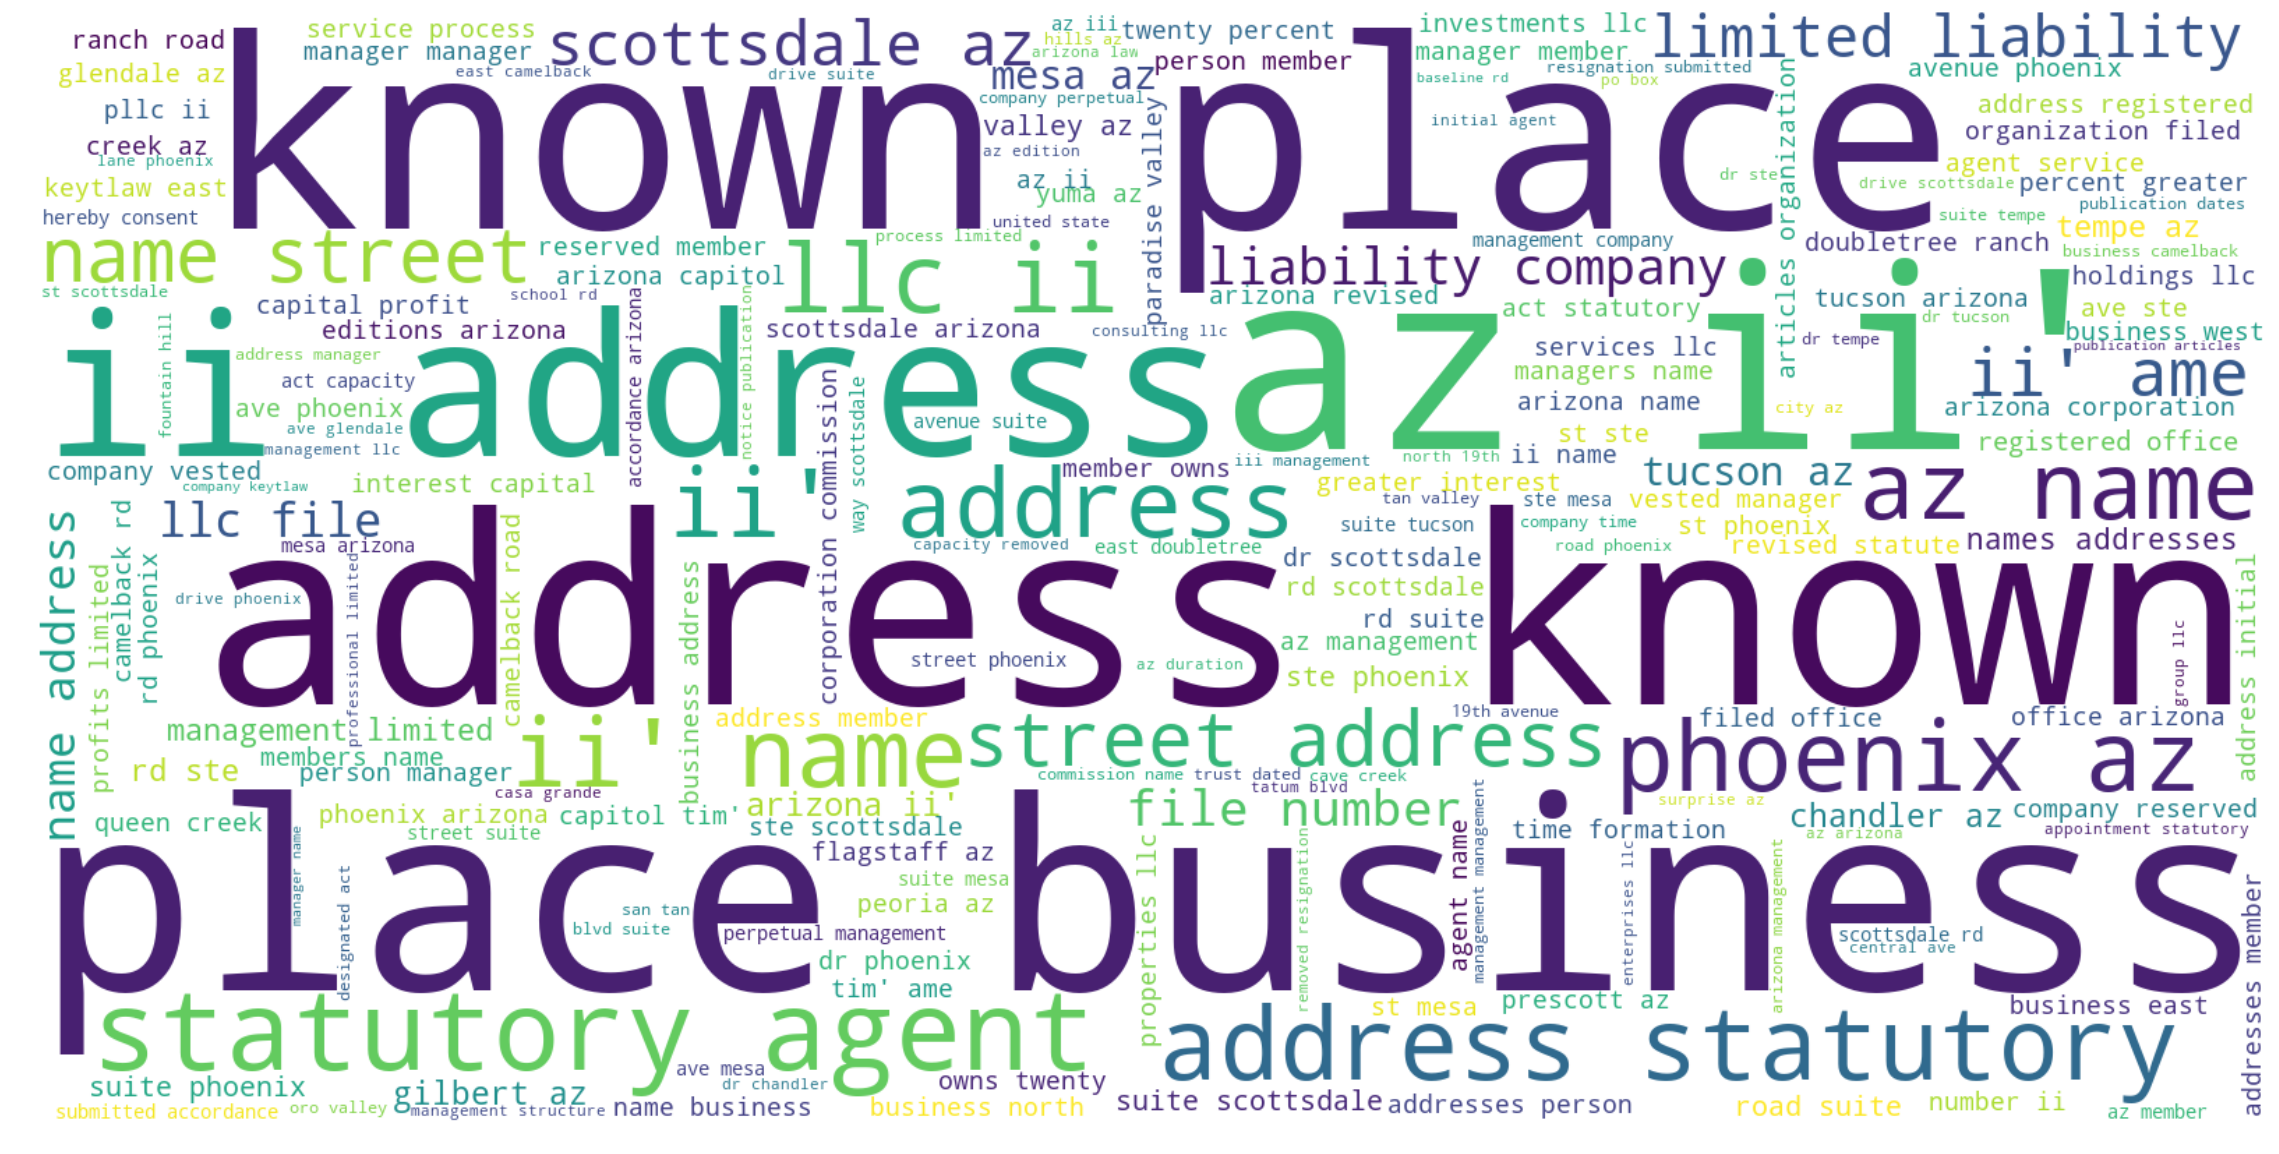

In [39]:
# the matplotlib way:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

#wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords)
#wordcloud.generate_from_frequencies(frequencies=word_freq)
text = results
wordcloud = WordCloud(width=1600, 
                      height=800,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      random_state=42
                      ).generate(str(text))

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")